In [1]:
import pandas as pd


import sqlite3

In [2]:
conn= sqlite3.connect('Data\FPA_FOD_20221014.sqlite')

In [3]:
# checking sqlite file structure to find out information table we want is "fires"
show_tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(show_tables_query, conn)
tables

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,views_geometry_columns
5,virts_geometry_columns
6,geometry_columns_statistics
7,views_geometry_columns_statistics
8,virts_geometry_columns_statistics
9,geometry_columns_field_infos


In [4]:
# preview all columns from the fires table to see what data will be applicable for visualizations
query="""
SELECT * FROM Fires
"""
df=pd.read_sql_query(query,conn)

In [5]:
# explore all cols of the fire table
df.columns

Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [6]:
#after an overview I would only like the columns pertaing to :  'STATE' 'COUNTY' 'FIRE_NAME''FIRE_YEAR' 'FIRE_SIZE'  'DISCOVERY_DATE' 'CONT_DATE' 'NWCG_GENERAL_CAUSE' 'LATITUDE', 'LONGITUDE' 
query= """SELECT STATE, COUNTY, FIRE_NAME,FIRE_YEAR, FIRE_SIZE, DISCOVERY_DATE, CONT_DATE, NWCG_GENERAL_CAUSE, LATITUDE, LONGITUDE FROM 'Fires' """
df=pd.read_sql_query(query,conn)
df.head()

,STATE,COUNTY,FIRE_NAME,FIRE_YEAR,FIRE_SIZE,DISCOVERY_DATE,CONT_DATE,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE
0,CA,63,FOUNTAIN,2005,0.10,2/2/2005,2/2/2005,Power generation/transmission/distribution,40.036944,-121.005833
1,CA,61,PIGEON,2004,0.25,5/12/2004,5/12/2004,Natural,38.933056,-120.404444
2,CA,17,SLACK,2004,0.10,5/31/2004,5/31/2004,Debris and open burning,38.984167,-120.735556
3,CA,3,DEER,2004,0.10,6/28/2004,7/3/2004,Natural,38.559167,-119.913333
4,CA,3,STEVENOT,2004,0.10,6/28/2004,7/3/2004,Natural,38.559167,-119.933056


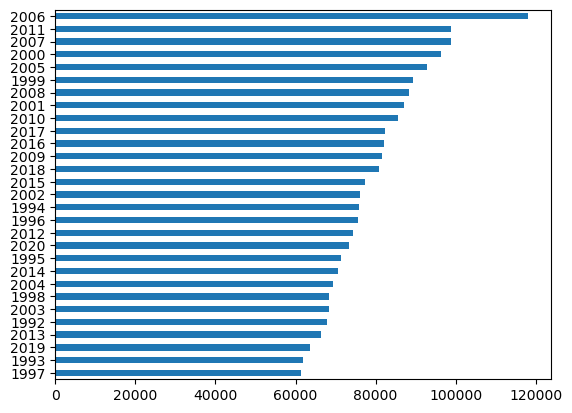

In [21]:
import matplotlib.pyplot as plt

df['FIRE_YEAR'].value_counts().sort_values().plot(kind='barh')
plt.show()

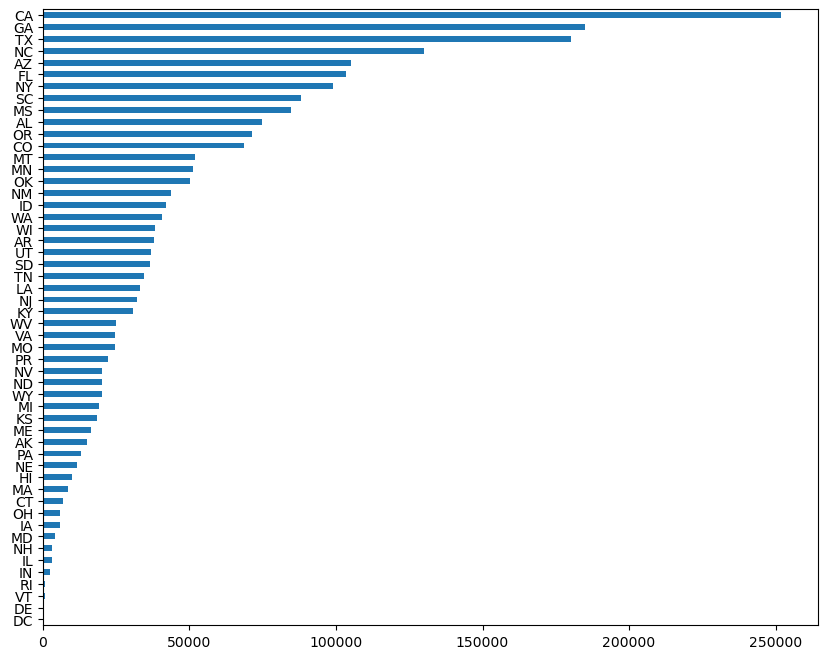

In [20]:

plt.figure(figsize=(10, 8))
df['STATE'].value_counts().sort_values().plot(kind='barh')
plt.show()